In [21]:
# Practice from https://www.kaggle.com/dczerniawko/fifa19-analysis

# Load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import geopandas as gpd
import pycountry
import re
from collections import Counter

from math import pi
import os

sns.set_style('darkgrid')

In [2]:
# Read the data from csv
data = pd.read_csv('data_clean.csv')
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release.Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,48,22,94,94,75,96,33,28,26,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,63,29,95,82,85,95,28,31,23,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,56,36,89,87,81,94,27,24,33,€228.1M
3,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,76,61,87,94,79,88,68,58,51,€196.4M
4,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,54,41,87,89,86,91,34,27,22,€172.1M


In [201]:
# Read the team data from csv
data_team = pd.read_csv('team_feat.csv')
data_team.head()

,Club,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,FC Barcelona,80.624762,81.540689,76.743699,86.233703,77.523263,87.379045,83.402224,78.630741,82.103122,...,84.587318,80.668831,82.019126,82.982612,85.638621,75.680514,85.848813,82.182410,82.643650,80.606194
1,Juventus,80.495334,75.758980,81.613443,83.617383,77.726166,86.550217,80.212445,75.721462,79.023427,...,80.500474,83.576022,84.545438,81.106938,81.176026,75.442387,86.264913,86.168934,84.823112,82.065028
2,Paris Saint-Germain,79.531426,78.912998,78.253834,83.517988,77.806257,86.863422,79.097747,73.191969,79.915847,...,76.939473,80.175797,79.837103,82.382379,80.979717,72.489087,85.425072,77.762681,81.453026,80.657904
3,Manchester City,82.686928,79.163850,78.137206,86.054632,76.534332,86.918916,80.727223,74.597303,80.991614,...,78.864339,82.888840,80.487037,84.254902,84.419930,74.323631,85.790583,80.626592,81.311101,79.907257
4,Chelsea,79.661222,76.401368,80.805291,85.791241,75.951087,85.484944,78.890724,77.036104,82.453592,...,77.086436,82.087988,81.659388,80.453179,83.892132,78.327559,83.957929,80.510124,83.038889,79.721043


In [5]:
# Look the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 74 columns):
ID                          16122 non-null int64
Name                        16122 non-null object
Age                         16122 non-null int64
Nationality                 16122 non-null object
Overall                     16122 non-null int64
Potential                   16122 non-null int64
Club                        15926 non-null object
Value                       16122 non-null object
Wage                        16122 non-null object
Special                     16122 non-null int64
International.Reputation    16122 non-null int64
Weak.Foot                   16122 non-null int64
Skill.Moves                 16122 non-null int64
Position                    16122 non-null object
Jersey.Number               16122 non-null int64
Contract.Valid.Until        15926 non-null object
Height.cm.                  16122 non-null float64
Weight.lbs.                 16122 non-null int64


In [7]:
# Look the digital information
data.describe()

,ID,Age,Overall,Potential,Special,International.Reputation,Weak.Foot,Skill.Moves,Jersey.Number,Height.cm.,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,...,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,215083.994294,25.005272,66.461233,71.515631,1667.311066,1.115494,3.004590,2.532502,19.424203,180.388683,...,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723
std,28582.147476,4.547106,6.794631,6.074413,196.456304,0.396542,0.636915,0.617823,15.595258,6.430065,...,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624
min,16.000000,16.000000,46.000000,48.000000,1000.000000,1.000000,1.000000,2.000000,2.000000,154.940000,...,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000
25%,200917.250000,21.000000,62.000000,67.000000,1526.000000,1.000000,3.000000,2.000000,9.000000,175.260000,...,40.000000,50.000000,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000
50%,222027.500000,25.000000,66.000000,71.000000,1670.000000,1.000000,3.000000,2.000000,17.000000,180.340000,...,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000
75%,236638.250000,28.000000,71.000000,75.000000,1805.750000,1.000000,3.000000,3.000000,26.000000,185.420000,...,64.000000,70.000000,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000
max,246620.000000,41.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,203.200000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [5]:
# Datafram column
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'International.Reputation', 'Weak.Foot',
       'Skill.Moves', 'Position', 'Jersey.Number', 'Contract.Valid.Until',
       'Height.cm.', 'Weight.lbs.', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'Release.Clause'],
      dtype='object')

In [9]:
# Show the shape of dataset
data.shape

(16122, 74)

In [10]:
# Number of unique elements in dataset
data.nunique()

ID                          16122
Name                        15298
Age                            26
Nationality                   163
Overall                        48
Potential                      46
Club                          651
Value                         211
Wage                          144
Special                      1038
International.Reputation        5
Weak.Foot                       5
Skill.Moves                     4
Position                       26
Jersey.Number                  98
Contract.Valid.Until           36
Height.cm.                     20
Weight.lbs.                    53
LS                             59
ST                             59
RS                             59
LW                             64
LF                             64
CF                             64
RF                             64
RW                             64
LAM                            64
CAM                            64
RAM                            64
LM            

In [11]:
# Check if there is null value exisisted
data.isnull().any()

ID                          False
Name                        False
Age                         False
Nationality                 False
Overall                     False
Potential                   False
Club                         True
Value                       False
Wage                        False
Special                     False
International.Reputation    False
Weak.Foot                   False
Skill.Moves                 False
Position                    False
Jersey.Number               False
Contract.Valid.Until         True
Height.cm.                  False
Weight.lbs.                 False
LS                          False
ST                          False
RS                          False
LW                          False
LF                          False
CF                          False
RF                          False
RW                          False
LAM                         False
CAM                         False
RAM                         False
LM            

In [ ]:
# Analysis

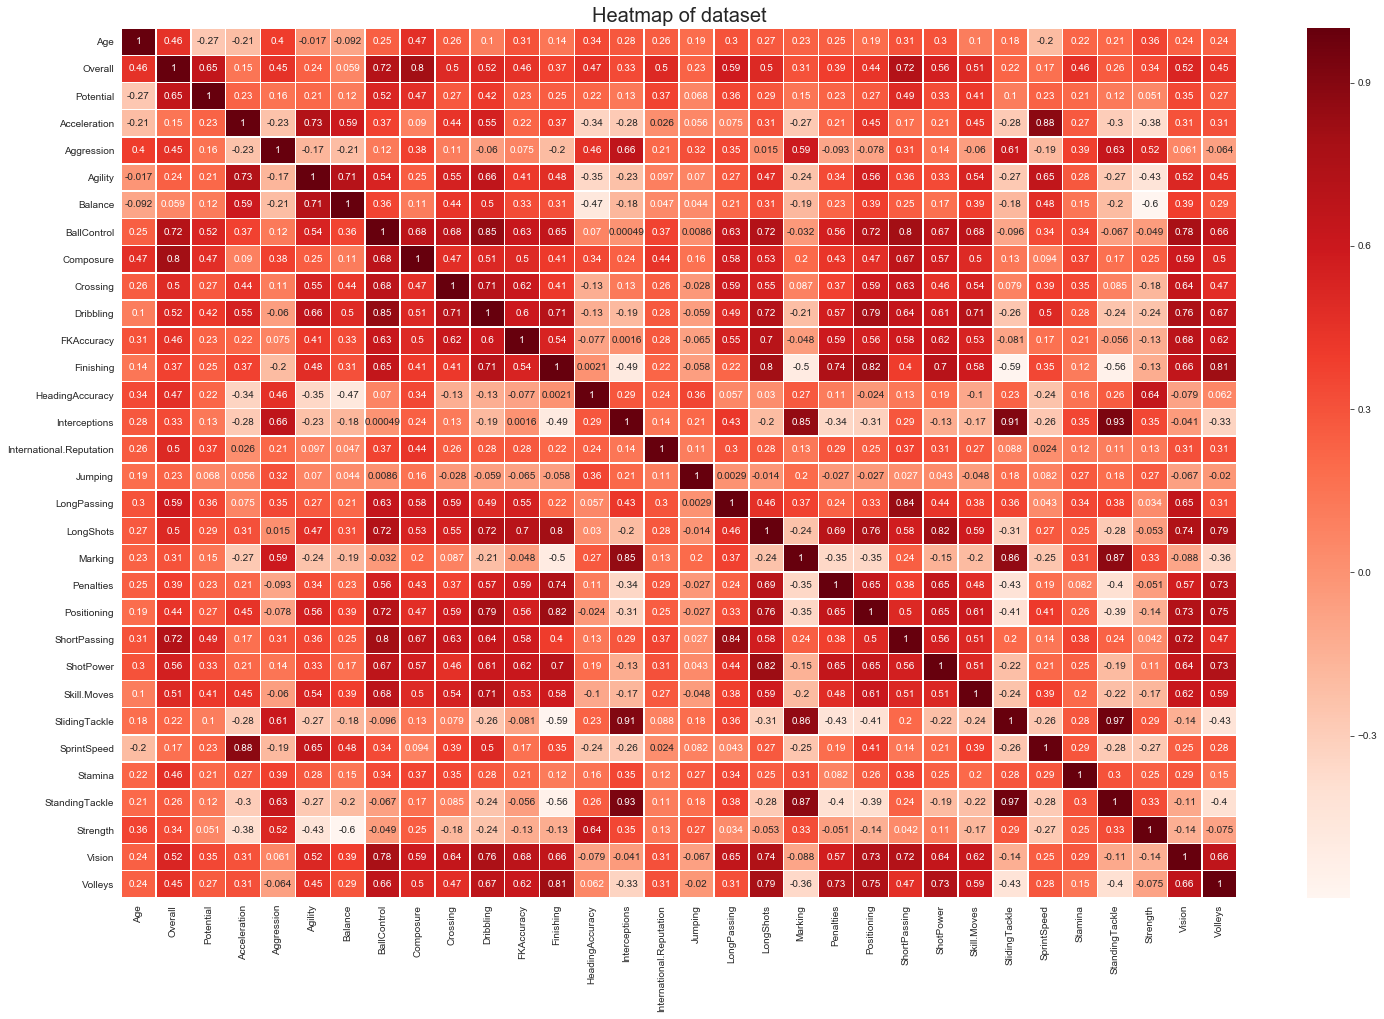

In [15]:
# HeatMap
player_characteristics = ['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International.Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill.Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']



plt.figure(figsize= (25, 16))


hm=sns.heatmap(data[player_characteristics].corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

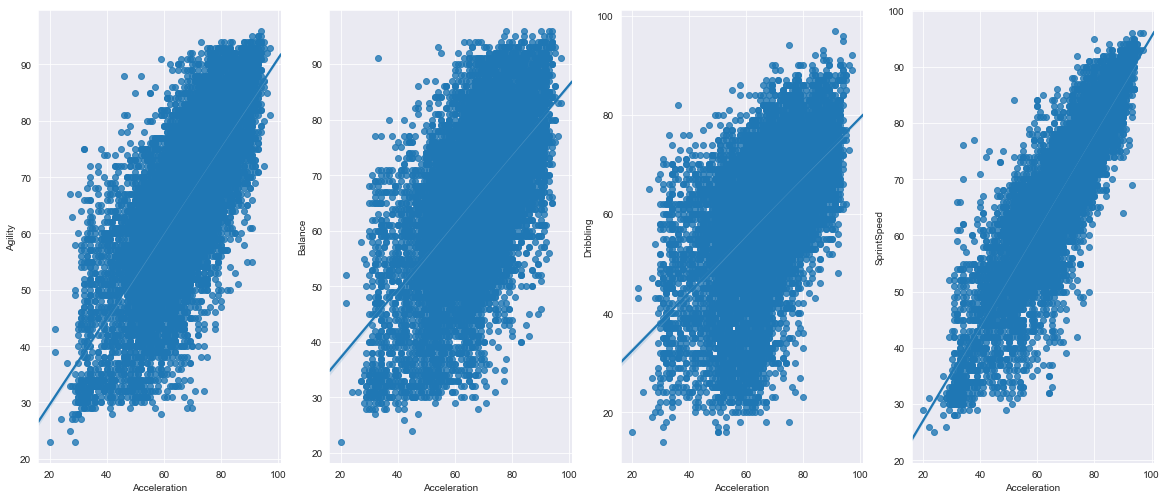

In [17]:
# Correlation between Acceleration and other
def make_scatter(df):
    feats = ('Agility', 'Balance', 'Dribbling', 'SprintSpeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1)
        ax = sns.regplot(x='Acceleration', y=feat, data=df)

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

make_scatter(data)

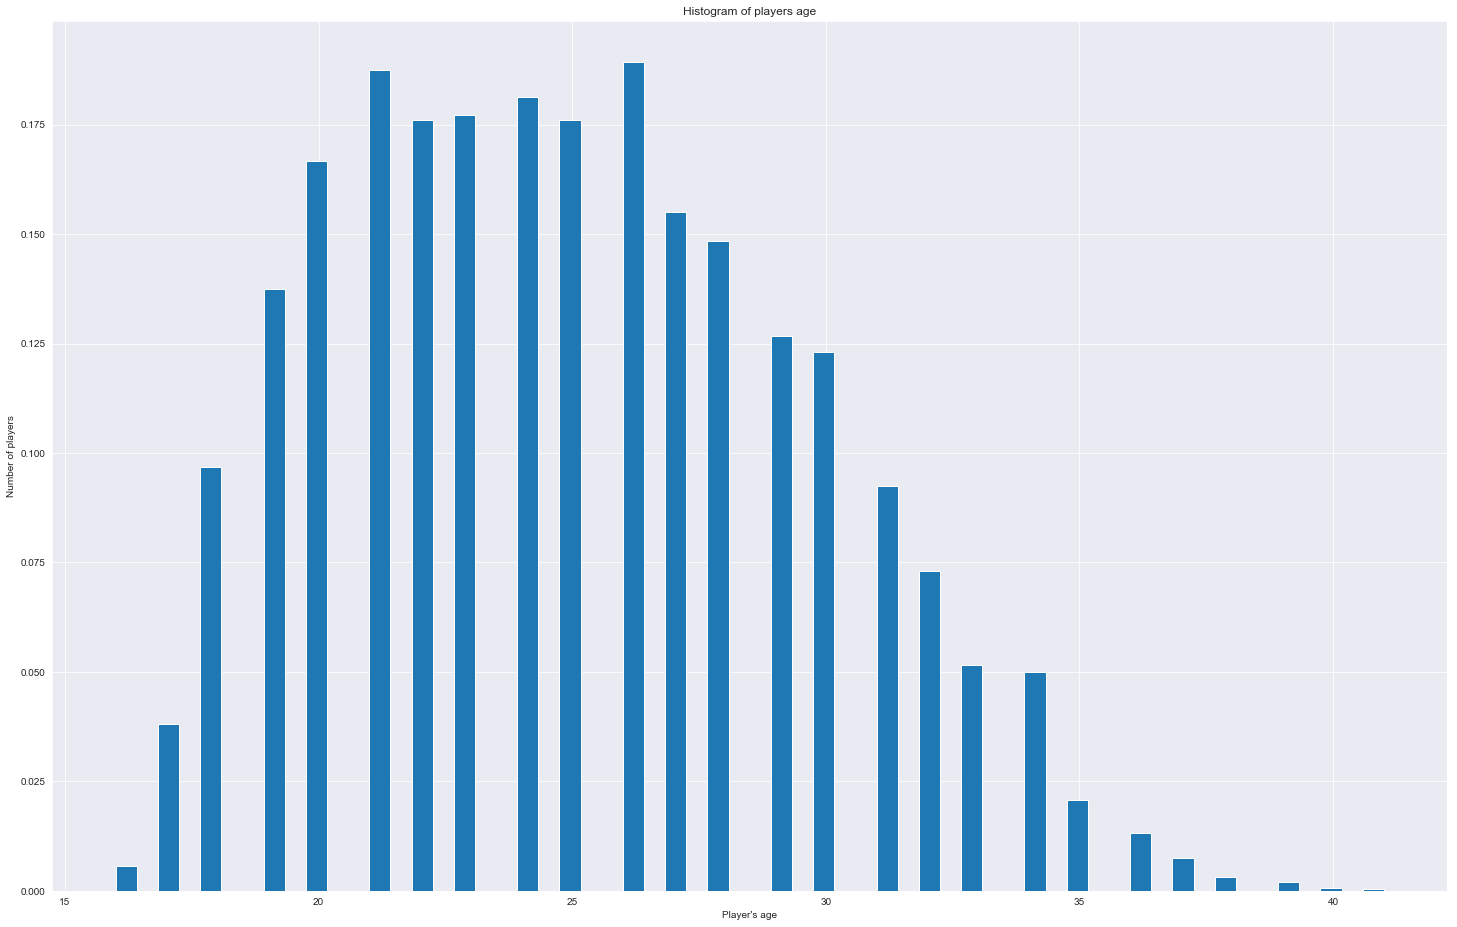

In [20]:
# Histogram: player's age
x = data.Age

num_bins = 60
fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=1) # Draw histogram

ax.set_xlabel('Player\'s age')
ax.set_ylabel('Number of players')
ax.set_title('Histogram of players age')
plt.show()

In [21]:
# Ten eldest and youngest players
eldest = data.sort_values('Age', ascending=False)[['Name', 'Age', 'Club', 'Overall']].head(10)
youngest = data.sort_values('Age', ascending=True)[['Name', 'Age', 'Club', 'Overall']].head(10)

eldest.set_index('Name', inplace=True)
youngest.set_index('Name', inplace=True)

print(eldest)
print(youngest)

                 Age                     Club  Overall
Name                                                  
H. Sulaimani      41                Ohod Club       63
B. Nivet          41             ESTAC Troyes       71
F. Kippe          40     Lillestr<U+00F8>m SK       65
Y. Nakazawa       40      Yokohama F. Marinos       61
Hilton            40          Montpellier HSC       78
S. Nakamura       40             Júbilo Iwata       72
W. Díaz           40      Jaguares de Córdoba       63
R. Bra<U+00F1>a   39  Estudiantes de La Plata       70
D. Bulman         39             Crawley Town       60
S. Pellissier     39            Chievo Verona       72
                 Age                                Club  Overall
Name                                                             
G. Nugent         16                     Tranmere Rovers       46
T. Gundelund      16                      Vejle Boldklub       48
A. Do<U+011F>an   16                         Kayserispor       55
G. Hollywo

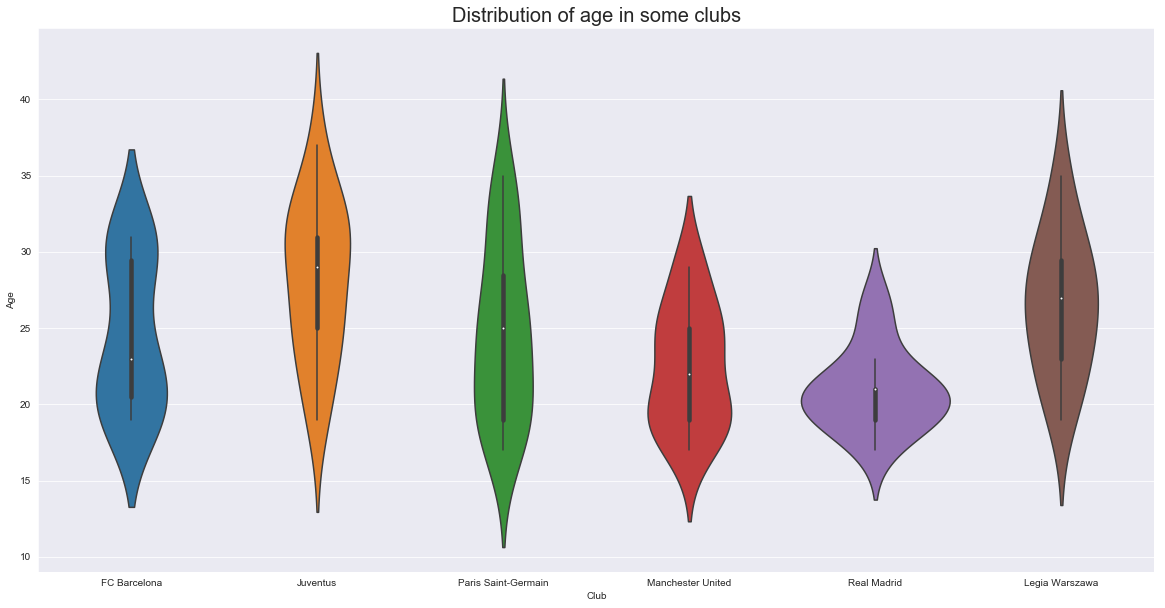

In [26]:
# Compare six clubs in relation to age
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = data.loc[data['Club'].isin(some_clubs) & data['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

In [31]:
# The oldest team
data.groupby(['Club'])['Age'].sum().sort_values(ascending=False).head(5)


Club
Cardiff City       772
Frosinone          764
West Ham United    762
Villarreal CF      758
MKE Ankaragücü     748
Name: Age, dtype: int64

In [32]:
# The youngest team
data.groupby(['Club'])['Age'].sum().sort_values(ascending=True).head(5)

Club
Derry City          344
Sligo Rovers        381
Limerick FC         395
Troms<U+00F8> IL    428
FK Haugesund        439
Name: Age, dtype: int64

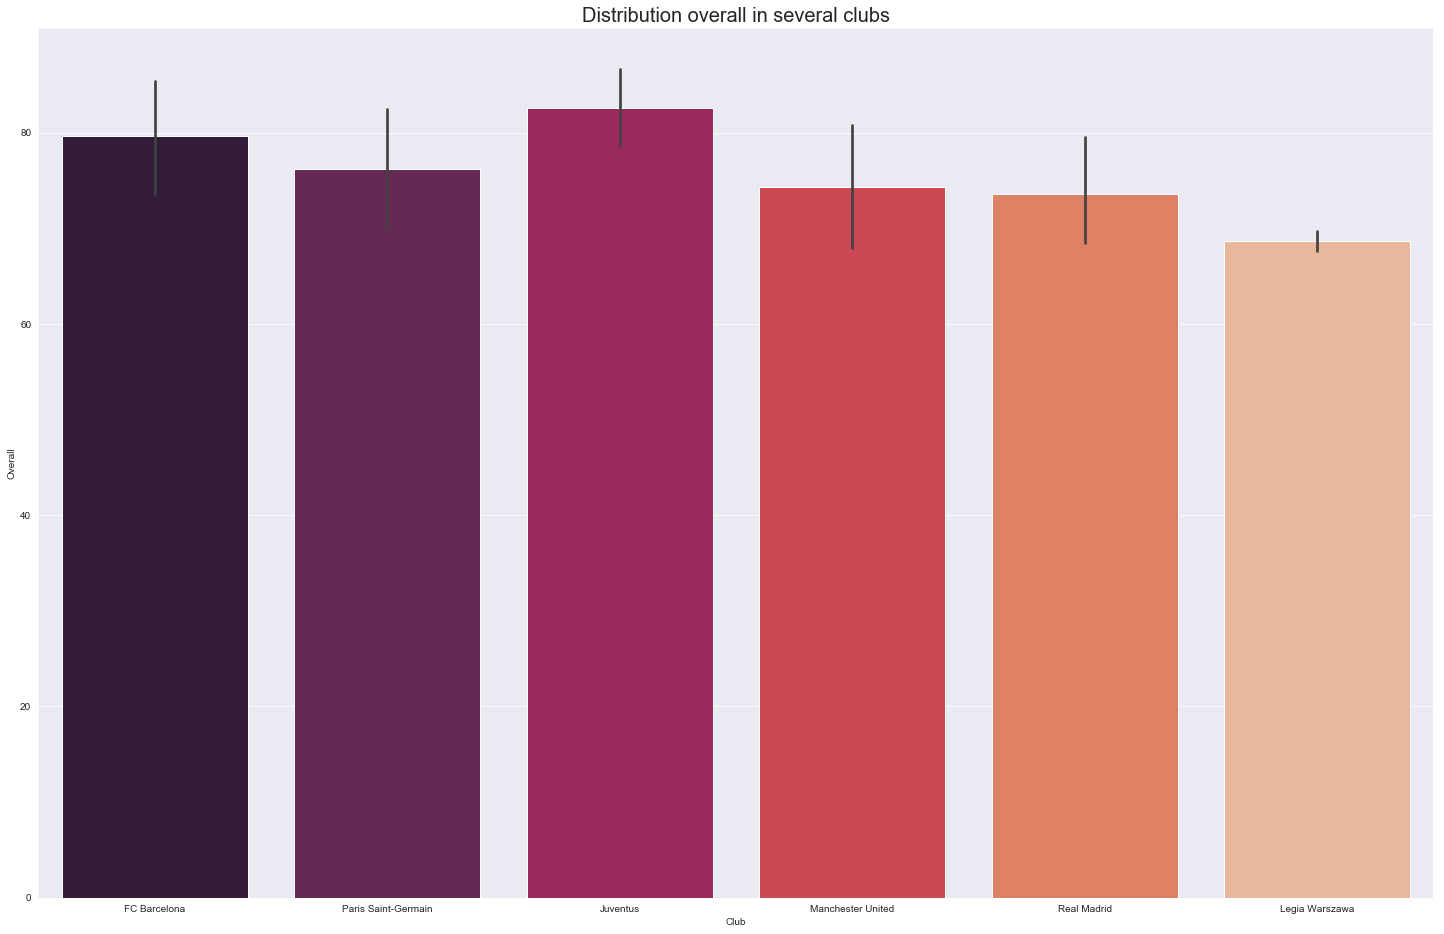

In [33]:
# The clubs and their players overalls
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = data.loc[data['Club'].isin(some_clubs) & data['Age'] & data['Overall']]

ax = sns.barplot(x=df_club['Club'], y=df_club['Overall'], palette="rocket");
ax.set_title(label='Distribution overall in several clubs', fontsize=20);

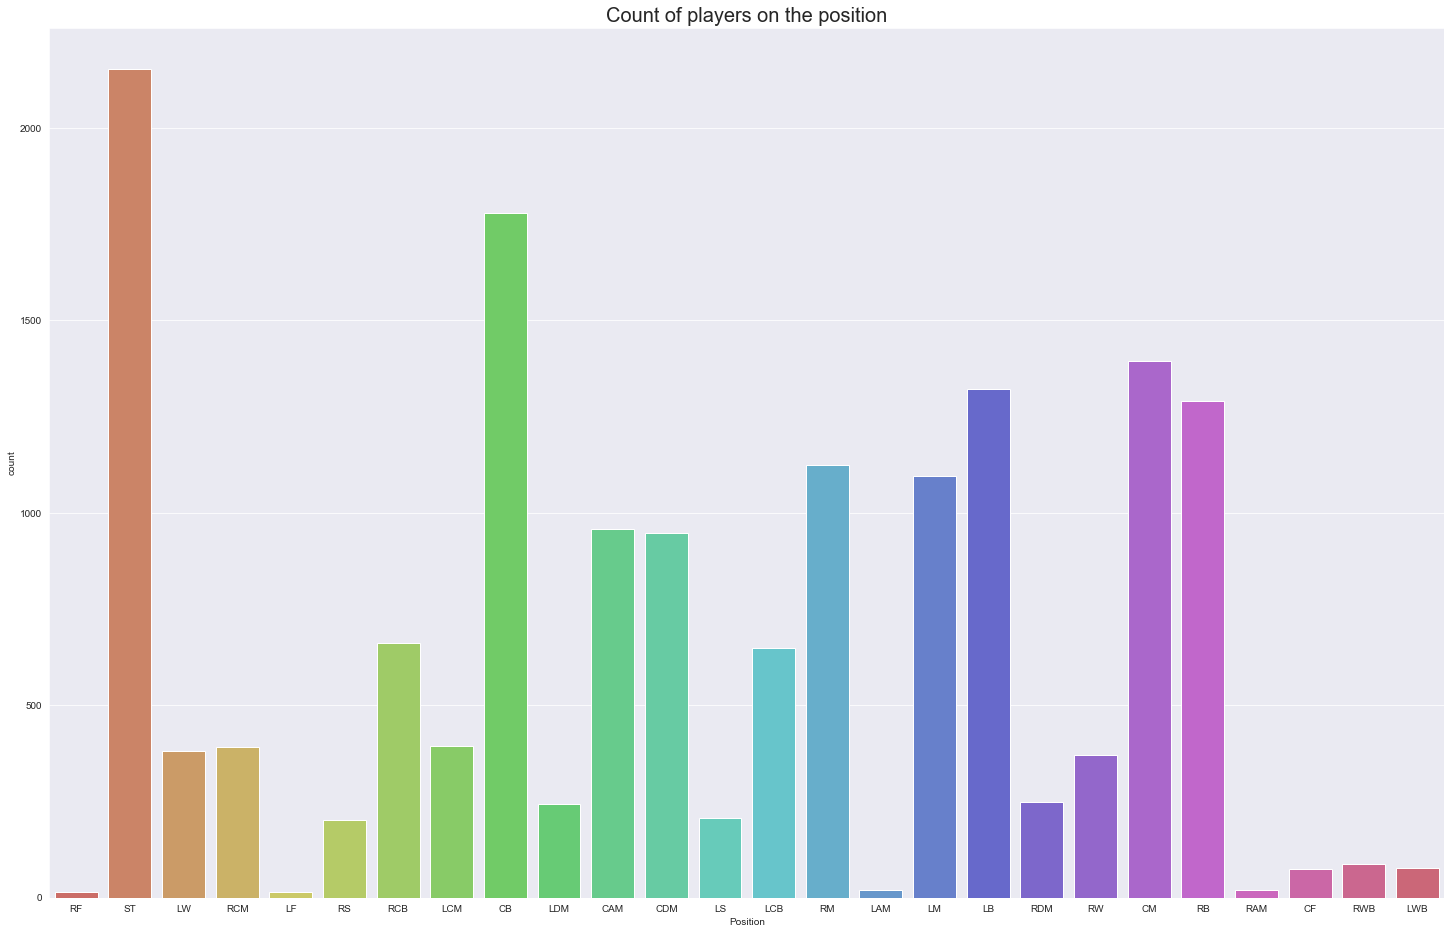

In [35]:
# All of position
ax = sns.countplot(x = 'Position', data = data, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

# Method 3
1. Group the player into three main groups

2. Calculate the Pearson Correlation between each specific position and  specific features, list the 12 most relevant features for each specific positions, group all positions together into only three, ATK, MID and DEF, thus we get the three 1 * 12 vector for three main groups.

3. Get 3 features-teams matrixs , transfer the features' score into weights(use Reciprocal Function) and thus we have 3 weighted-teams matrixs.

4. Create three sections, each section has a m*n and n*k matrix, where m is the number of players, n is the number of features' weights, and k is the number of teams. For all these three pairs of matrices, do the matrix multiplication. Then we can get 3 MxK matrices for DEF, MID and ATK positions.

5. We can do the recommandations based on these three matrices.

In [259]:
"""
Step 1: Function to group the players' positions into three main groups: DEF, MID, FWD
"""
def groupPosition(df):
    # Regex to group
    defs = r'\w*B$'
    mids = r'\w*M$'
    fwds = r'\w*[FSTW]$'
    
    # groupPosition list
    groupPositions = []
    for index, row in df.iterrows():
        position = row['Position']
        if re.match(defs, position):
            groupPositions.append('DEF')
        if re.match(mids, position):
            groupPositions.append('MID')
        if re.match(fwds, position):
            groupPositions.append('FWD')
    series = pd.Series(groupPositions)
    data['GroupPosition'] = series
    
groupPosition(data)
# print(data['GroupPosition'])
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release.Clause,GroupPosition
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,22,94,94,75,96,33,28,26,€226.5M,FWD
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,29,95,82,85,95,28,31,23,€127.1M,FWD
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,36,89,87,81,94,27,24,33,€228.1M,FWD
3,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,61,87,94,79,88,68,58,51,€196.4M,MID
4,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,41,87,89,86,91,34,27,22,€172.1M,FWD


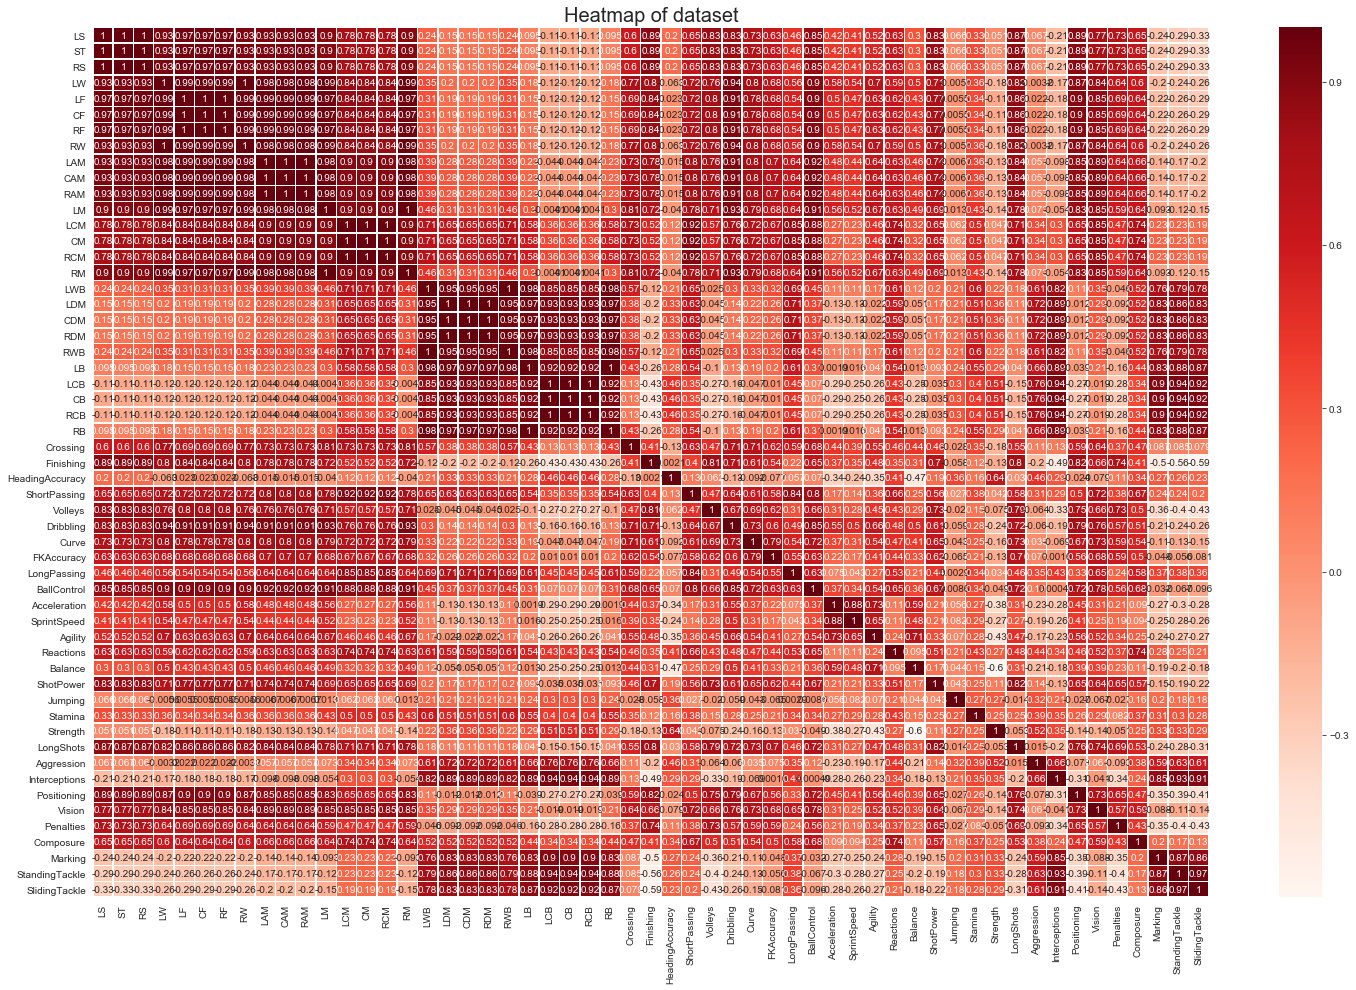

In [267]:
"""
Step 2: Calculate the Pearson Correlation between each specific position and specific features,
list the 12 most relevant features for each specific positions, then group it to thre.
"""

## Step: 2.1: Calculate the Pearson Correlation between each specific position and specific features
plt.figure(figsize= (25, 16))


hm=sns.heatmap(data.loc[:, 'LS':'SlidingTackle'].corr(), annot = True, linewidths=.5, cmap='Reds')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

In [270]:
# Step 2.2: Find out top characteristics for different position
player_characteristics = ['Crossing','Finishing', 'HeadingAccuracy', 
                          'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                          'FKAccuracy', 'LongPassing', 'BallControl', 
                          'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 
                          'Balance', 'ShotPower', 'Jumping', 'Stamina', 
                          'Strength', 'LongShots', 'Aggression',
                          'Interceptions', 'Positioning', 'Vision', 
                          'Penalties', 'Composure', 'Marking', 'StandingTackle', 
                          'SlidingTackle']

## Top characteristics for  positions
corr_matrix = data.corr() # default is pearson
counter_DEF = Counter()
counter_MID = Counter()
counter_ATK = Counter()
defs = r'\w*B$'
mids = r'\w*M$'
fwds = r'\w*[FSTW]$'
for index, row in corr_matrix.loc[player_characteristics, "LS":"RB"].T.iterrows():

    largests = tuple(row.nlargest(12).index)
#     print('Position {}: {}, {}, {}, {}, {}, {}, {}, {}'.format(index, *tuple(row.nlargest(8).index)))
    
    if re.match(defs, index): # DEF
        for feature in largests:
            counter_DEF[feature] += 1
    if re.match(mids, index): # MID
        for feature in largests:
            counter_MID[feature] += 1
    if re.match(fwds, index): # FWD
        for feature in largests:
            counter_ATK[feature] += 1

# 3. Group all positions together into only three, ATK, MID and DEF, thus we get the three 1 * 8 vector for three main groups.
features_DEF = [kv[0] for kv in counter_DEF.most_common(12)]
features_MID = [kv[0] for kv in counter_MID.most_common(12)]
features_ATK = [kv[0] for kv in counter_ATK.most_common(12)]

print("\nDEF: {}\n".format(features_DEF))
print("\nMID: {}\n".format(features_MID))
print("\nATK: {}\n".format(features_ATK))
# pd.Series(features_DEF)



DEF: ['Interceptions', 'StandingTackle', 'SlidingTackle', 'Marking', 'LongPassing', 'ShortPassing', 'Aggression', 'Reactions', 'Stamina', 'Composure', 'Crossing', 'BallControl']


MID: ['BallControl', 'ShortPassing', 'Crossing', 'Dribbling', 'Vision', 'Positioning', 'LongShots', 'Curve', 'FKAccuracy', 'LongPassing', 'Reactions', 'Composure']


ATK: ['Positioning', 'Finishing', 'LongShots', 'BallControl', 'ShotPower', 'Volleys', 'Dribbling', 'Vision', 'Curve', 'ShortPassing', 'Penalties', 'Crossing']



In [275]:
"""
Step 3: Get 3 features-teams matrixs , transfer the features' score into weights(use Reciprocal Function) and thus we have 3 weighted-teams matrixs.
"""

teams_columns = dict(zip(range(0,data_team['Club'].size), data_team['Club']))

features_teams_DEF = data_team.loc[:, features_DEF].T
features_teams_DEF = features_teams_DEF.rename(columns=teams_columns)
features_teams_MID = data_team.loc[:, features_MID].T
features_teams_MID = features_teams_MID.rename(columns=teams_columns)
features_teams_ATK = data_team.loc[:, features_ATK].T
features_teams_ATK = features_teams_ATK.rename(columns=teams_columns)
# print(features_teams_DEF)
# print(features_teams_MID)
# print(features_teams_ATK)

weights_teams_DEF = features_teams_DEF.applymap(lambda x: 1./float(x))
weights_teams_MID = features_teams_MID.applymap(lambda x: 1./float(x))
weights_teams_ATK = features_teams_ATK.applymap(lambda x: 1./float(x))

# weights_teams_DEF
# weights_teams_MID
weights_teams_ATK


,FC Barcelona,Juventus,Paris Saint-Germain,Manchester City,Chelsea,Real Madrid,FC Bayern München,Atlético Madrid,Tottenham Hotspur,Liverpool,...,Crewe Alexandra,Yeovil Town,Bohemian FC,Macclesfield Town,Cambridge United,Newport County,Sligo Rovers,Derry City,Limerick FC,Bray Wanderers
Positioning,0.012051,0.012329,0.012139,0.011869,0.012430,0.012441,0.012207,0.012160,0.012143,0.012291,...,0.017623,0.017220,0.017920,0.017061,0.016850,0.017779,0.017467,0.018506,0.018905,0.019128
Finishing,0.012264,0.013200,0.012672,0.012632,0.013089,0.012899,0.012554,0.012692,0.012590,0.012643,...,0.017775,0.017342,0.018278,0.017371,0.017918,0.017617,0.019007,0.020265,0.019850,0.020471
LongShots,0.011822,0.012422,0.012997,0.012680,0.012972,0.012005,0.012274,0.013105,0.012538,0.013038,...,0.018655,0.018494,0.018358,0.017764,0.019614,0.017131,0.018905,0.020854,0.019667,0.020816
BallControl,0.011351,0.011431,0.011464,0.011353,0.011637,0.011326,0.011626,0.011829,0.011830,0.011779,...,0.016846,0.016176,0.017200,0.016730,0.017116,0.016373,0.017512,0.018206,0.018181,0.018173
ShotPower,0.012126,0.011936,0.012285,0.011900,0.012386,0.011957,0.012046,0.012715,0.012063,0.012325,...,0.017795,0.016622,0.017579,0.016709,0.017173,0.015451,0.017056,0.017668,0.018643,0.018903
Volleys,0.012899,0.012866,0.012852,0.013066,0.013166,0.013436,0.012258,0.013397,0.013227,0.013683,...,0.020204,0.020066,0.019789,0.019186,0.020411,0.019390,0.019161,0.022575,0.020997,0.024305
Dribbling,0.011444,0.011554,0.011512,0.011505,0.011698,0.011658,0.011810,0.012111,0.011909,0.011809,...,0.016749,0.016198,0.017272,0.016998,0.016556,0.016660,0.017340,0.017714,0.018180,0.018355
Vision,0.011677,0.012319,0.012349,0.011846,0.011920,0.011949,0.012167,0.012497,0.012313,0.012369,...,0.017619,0.017213,0.017880,0.017262,0.017678,0.016944,0.018339,0.019362,0.018321,0.019628
Curve,0.011990,0.012467,0.012643,0.012387,0.012676,0.012089,0.012222,0.012808,0.012694,0.012613,...,0.019077,0.018838,0.018741,0.019147,0.019804,0.017425,0.017870,0.019288,0.018881,0.021322
ShortPassing,0.011596,0.011959,0.011973,0.011621,0.011656,0.011550,0.011826,0.012071,0.011988,0.011980,...,0.016638,0.016733,0.017497,0.016615,0.016772,0.015757,0.017507,0.018248,0.018261,0.018128


In [277]:
"""
Step 4:  Create three sections, each section has a m*n and n*k matrix, where m is the number of players, n is the number of features' weights, and k is the number of teams. For all these three pairs of matrices, do the matrix multiplication. Then we can get 3 MxK matrices for DEF, MID and ATK positions.
"""

players_rows = dict(zip(range(0, data['Name'].size), data['Name']))

# DEF
players_features_DEF = data.loc[:, features_DEF]
players_features_DEF = players_features_DEF.rename(index=players_rows)
players_teams_DEF = players_features_DEF.dot(weights_teams_DEF)

# MID
players_features_MID = data.loc[:, features_MID]
players_features_MID = players_features_MID.rename(index=players_rows)
players_teams_MID = players_features_MID.dot(weights_teams_MID)

# ATK
players_features_ATK = data.loc[:, features_ATK]
players_features_ATK = players_features_ATK.rename(index=players_rows)
players_teams_ATK = players_features_ATK.dot(weights_teams_ATK)

players_teams_DEF
# print(players_teams_MID)
# print(players_teams_ATK)


,FC Barcelona,Juventus,Paris Saint-Germain,Manchester City,Chelsea,Real Madrid,FC Bayern München,Atlético Madrid,Tottenham Hotspur,Liverpool,...,Crewe Alexandra,Yeovil Town,Bohemian FC,Macclesfield Town,Cambridge United,Newport County,Sligo Rovers,Derry City,Limerick FC,Bray Wanderers
L. Messi,9.226979,9.218904,9.384035,9.233025,9.300521,9.222309,9.370014,9.455698,9.322694,9.425811,...,13.055256,12.801018,13.772407,13.031334,13.022933,12.492884,13.653418,14.087554,14.031793,14.245963
Cristiano Ronaldo,9.375873,9.347978,9.529398,9.379121,9.442818,9.371893,9.518704,9.589089,9.452793,9.558027,...,13.193955,12.898288,13.913726,13.177416,13.094170,12.603555,13.771729,14.223893,14.192844,14.406957
Neymar Jr,9.280748,9.257754,9.433254,9.287819,9.350769,9.275037,9.422576,9.497846,9.364568,9.468855,...,13.093536,12.811244,13.814880,13.070567,13.009272,12.520029,13.680353,14.120943,14.085336,14.288160
K. De Bruyne,11.347710,11.275819,11.554408,11.372375,11.423834,11.331999,11.536730,11.592628,11.424838,11.583194,...,15.996370,15.615959,16.908134,15.932252,15.964067,15.280594,16.771827,17.245523,17.278050,17.425288
E. Hazard,9.376525,9.353817,9.539437,9.387472,9.445958,9.371750,9.524526,9.600652,9.465553,9.570306,...,13.231420,12.948167,13.968984,13.208582,13.163320,12.651020,13.836339,14.280093,14.250392,14.441946
L. Modri<U+0107>,11.676774,11.596477,11.885086,11.716783,11.755690,11.649423,11.874800,11.933650,11.760211,11.922118,...,16.493193,16.118349,17.440351,16.431187,16.453133,15.800394,17.323768,17.764856,17.832457,17.958469
L. Suárez,10.170654,10.094910,10.349525,10.181730,10.238236,10.169186,10.338547,10.375619,10.229776,10.368193,...,14.280018,13.906495,15.082952,14.221062,14.208868,13.604057,14.929851,15.393215,15.410803,15.567272
Sergio Ramos,12.031674,11.903475,12.250278,12.079357,12.107113,12.012201,12.244660,12.270175,12.089395,12.283999,...,16.969909,16.519396,17.954305,16.856763,16.936241,16.202289,17.815844,18.259970,18.374115,18.436940
R. Lewandowski,9.120415,9.073639,9.274097,9.126520,9.178242,9.122680,9.262905,9.318657,9.184269,9.298522,...,12.832462,12.500249,13.514245,12.784535,12.708118,12.209594,13.373515,13.830802,13.823416,13.974659
T. Kroos,11.647845,11.568303,11.863323,11.688528,11.729741,11.623182,11.847886,11.911231,11.735864,11.905047,...,16.500323,16.135409,17.447224,16.419778,16.510350,15.805247,17.347699,17.780779,17.834017,17.943582


In [281]:
"""
Step 5: Do the recommendation
"""

# To recommend Most Valued People in DEF position for FC Barcelona
print(players_teams_DEF['FC Barcelona'].sort_values(ascending=False))

# To recommend Most Valued Clubs in ATK position for L. Messi
# print(players_teams_ATK.loc['L. Messi', :].sort_values(ascending=False))


N. Kanté                   12.420537
R. Nainggolan              12.218074
Marcelo                    12.189311
Sergio Busquets            12.109486
Azpilicueta                12.072417
M. Verratti                12.066928
Sergio Ramos               12.031674
Fabinho                    12.016195
B. Matuidi                 11.993900
Filipe Luís                11.992039
A. Vidal                   11.985802
Allan                      11.953695
Alex Telles                11.896493
Casemiro                   11.868386
Alex Sandro                11.836584
A. Kolarov                 11.832664
A. Witsel                  11.801081
Fernandinho                11.799183
J. Milner                  11.797916
Jordi Alba                 11.761383
M. Hummels                 11.760813
J. Kimmich                 11.734529
K. Strootman               11.722011
S. Khedira                 11.720703
Ander Herrera              11.712432
J. Vertonghen              11.711884
T. Alderweireld            11.711265
C

In [282]:
# To find out the Least Valued Players in DEF position in FC Barcelona, thus in the future we can replace them with better players.
def searchWorstPlayersInPosByTeam(df, groupPosition, teamName):
    for index, value in df[teamName].sort_values(ascending=True).iteritems():
        if data.loc[(data.loc[:, 'Name'] == index), :]['Club'].values[0] == teamName and data.loc[(data.loc[:, 'Name'] == index), :]['GroupPosition'].values[0] == groupPosition:
            print("{}\t\t{}".format(index, value))
searchWorstPlayersInPosByTeam(players_teams_DEF, 'DEF', 'FC Barcelona')

Chumi		8.496908998428664
Jorge Cuenca		8.744032112188615
T. Vermaelen		10.316082222746763
C. Lenglet		10.7130892112452
Nélson Semedo		11.102170739467933
Piqué		11.401180162595809
Sergi Roberto		11.533074846650187
S. Umtiti		11.684958212468592
Jordi Alba		11.761383021044406


In [31]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing','HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

for i, val in data.groupby(data['Position'])[player_characteristics].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, StandingTackle
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, StandingTackle
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: SprintSpeed, Acceleration, Stamina
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Stamina, ShortPassing, Aggression
Position RF: Agility, Acceleration, Balance
Position RM: Acceleration, Sprint

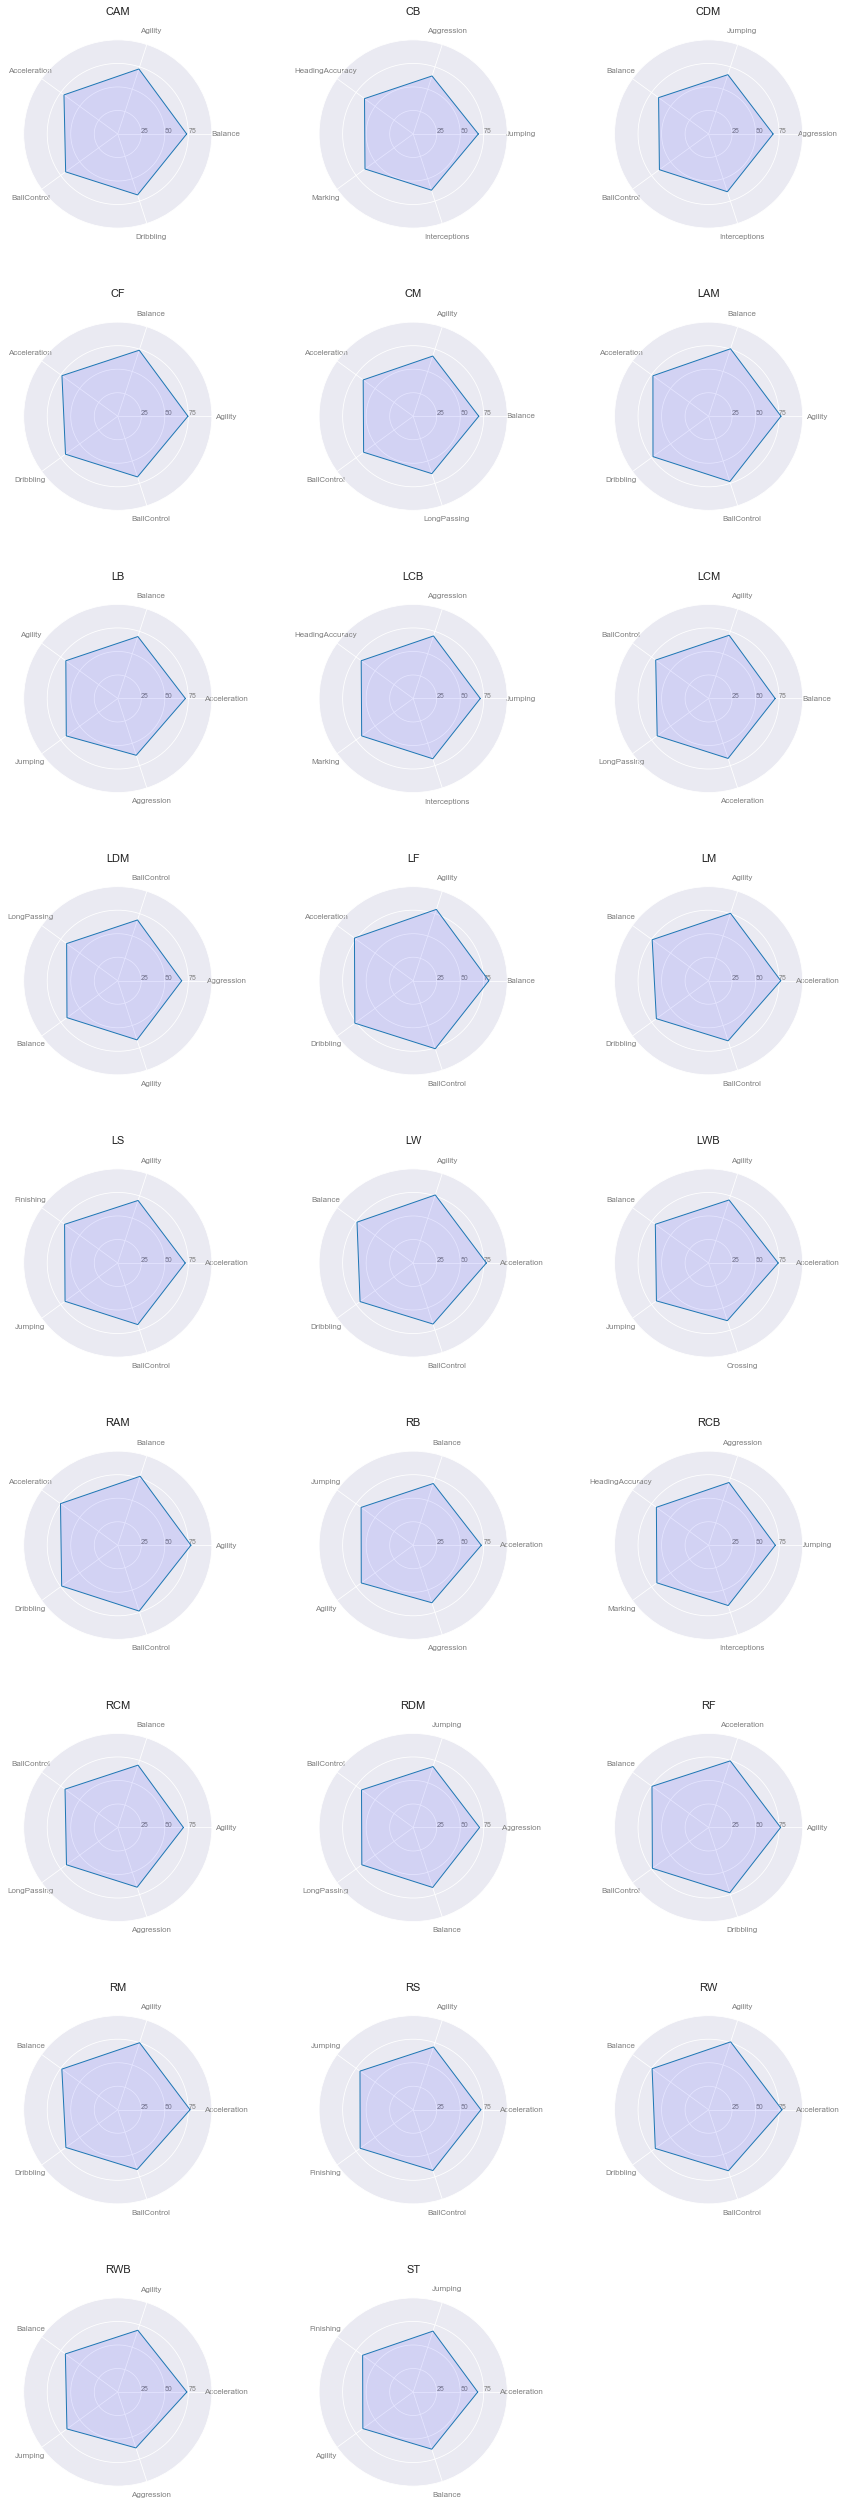

In [39]:
# Plot out the property plot of each position
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

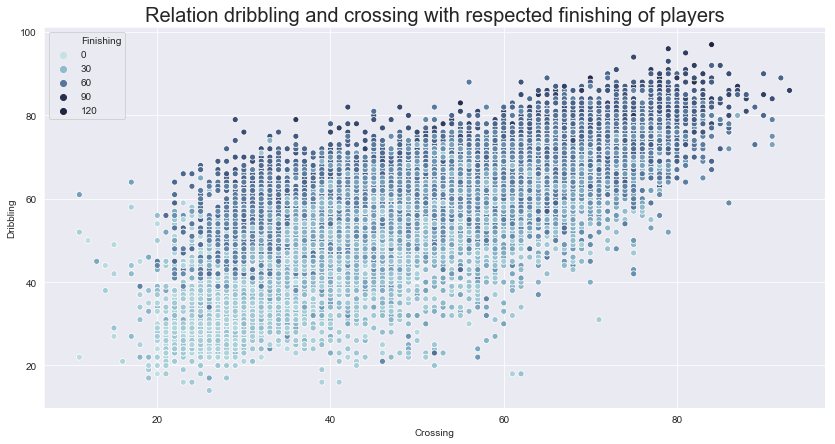

In [40]:
# Relation dribbling and crossing with respected finishing of players
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Crossing', y='Dribbling',
                     hue='Finishing',
                     palette=cmap, sizes=(1, 1),
                     data=data)
ax.set_title(label='Relation dribbling and crossing with respected finishing of players', fontsize=20);

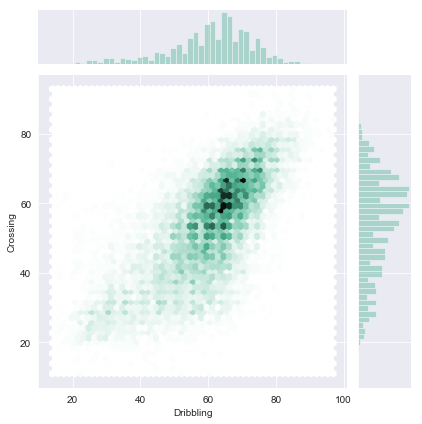

In [43]:
# Crossing vs. dribbling
sns.jointplot(x=data['Dribbling'], y=data['Crossing'], kind="hex", color="#4CB391");